### Task 1


In [19]:
import pandas as pd

In [20]:
DATA_PATH = "project1_data.csv"

data = pd.read_csv(DATA_PATH, sep=";")

In [21]:
data

,id,weight,height,sex,cats,age,income,savings,single,place,expenses
0,1,84.99,171.72,1,2,55,1213.10,480.45,0,1,326.33
1,2,91.06,175.83,1,2,41,1300.14,192.14,0,2,409.24
2,3,88.30,175.34,1,1,42,1203.19,643.34,0,3,274.26
3,4,84.51,167.64,1,1,50,1231.13,303.35,0,1,374.86
4,5,85.72,171.62,1,2,53,892.02,424.99,0,2,248.24
...,...,...,...,...,...,...,...,...,...,...,...
445,446,86.48,168.03,1,1,59,6838.88,2875.71,1,3,-391.65
446,447,91.96,171.22,2,2,50,1447.32,511.32,0,3,368.74
447,448,85.15,174.71,1,1,52,1142.19,519.33,0,2,287.80
448,449,86.92,166.04,1,5,41,944.19,633.63,0,3,229.27


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        450 non-null    int64  
 1   weight    450 non-null    float64
 2   height    450 non-null    float64
 3   sex       450 non-null    int64  
 4   cats      450 non-null    int64  
 5   age       450 non-null    int64  
 6   income    450 non-null    float64
 7   savings   450 non-null    float64
 8   single    450 non-null    int64  
 9   place     450 non-null    int64  
 10  expenses  450 non-null    float64
dtypes: float64(5), int64(6)
memory usage: 38.8 KB


In [23]:
# TODO: think whether ID is a variable

Some facts about the data:

- There are 450 observations in the sample
- There are 3 qualitative variables: sex, single, place
- There are 7 quantitative variables: weight, height, cats, age, income, savings, expenses
- There are no missing data, every observation has a non-null value for each variable


#### Qualitative variables summary


In [24]:
pd.crosstab(data["sex"], data["single"], margins=True)

single,0,1,All
sex,,,
1,144,86,230
2,142,78,220
All,286,164,450


In [25]:
pd.crosstab(data["sex"], data["place"], margins=True)

place,1,2,3,All
sex,,,,
1,57,108,65,230
2,50,107,63,220
All,107,215,128,450


In [26]:
pd.crosstab(data["place"], data["single"], margins=True)

single,0,1,All
place,,,
1,74,33,107
2,130,85,215
3,82,46,128
All,286,164,450


In [27]:
qual_vars = ["sex", "single", "place"]
qual_data = data[qual_vars]

qual_data.mode(axis=0)

,sex,single,place
0,1,0,2


In [28]:
data["place"].median()

np.float64(2.0)

Key observations:

- Data is almost evenly distributed in terms of the respondent's **gender** (230 females, 220 males)
- Data isn't equally distributed in terms of the **household status**, i.e. we can notice an over-representation of people living in a multi-person household (286 observations) in comparison to the people living in a single-person household (164 observations)
- Similar thing can be observed for the **place** variable, i.e. there is an over-representation of people living in medium towns, from 10,000 to 100,000 inhabitants (215 observations). On the other hand, there are only 107 observations of people living in small towns, i.e. up to 10,000 inhabitants and 128 observations of people living in large towns, i.e. over 100,000 inhabitants


#### Quantitative variables summary


In [29]:
quan_vars = ["weight", "height", "cats", "age", "income", "savings", "expenses"]
quan_data = data[qual_vars]
desc = quan_data.describe()

desc

,sex,single,place
count,450.000000,450.000000,450.000000
mean,1.488889,0.364444,2.046667
std,0.500433,0.481810,0.721944
min,1.000000,0.000000,1.000000
25%,1.000000,0.000000,2.000000
50%,1.000000,0.000000,2.000000
75%,2.000000,1.000000,3.000000
max,2.000000,1.000000,3.000000


In [30]:
iqr = desc.loc["75%"] - desc.loc["25%"]

iqr

sex       1.0
single    1.0
place     1.0
dtype: float64

In [31]:
expenses = data["expenses"]
filtered_expsenses = expenses[expenses >= 0]

filtered_expsenses.describe()

count    446.000000
mean     314.641614
std      110.529266
min        7.300000
25%      237.725000
50%      337.805000
75%      408.417500
max      486.790000
Name: expenses, dtype: float64

Key observations:

- The **weight** variable seems to be evenly distributed around 89.5 kg with a quite small standard deviation (~3.6 kg)
- Number of **cats** also looks to be evenly distributed. Mean and median of this variable are almost equal, an average resident of the Byteland owns 2 cats. Range of this variable is from 0 to 5 cats, so there are no observations with 6 or more cats
- Values of the **height** and **age** variables are less concentrated around the mean value (which can be concluded looking at the standard deviation and interquartile range) but also evenly distributed
- Range of the **age** variable is from 34 to 73, which means that there are no observations for young habitants. It can restrict our possibilities of reasoning for the **whole** population of the Byteland
- The **income** variable is definitely unevenly distributed. Mean and median values differ significantly, and because mean is higher than median we can conclude that the distribution is right-skewed. We can also observe high std and iqr values.
- There are some potential errors in the **savings** and (especially) **expenses** variables. The description of the dataset says about a possibility of negative savings values indicating that expenses were greater than the income of a respondent. However there are no negative values for the savings variable (which by only itself could be possible) and there are negative values for the expenses variable (which doesn't make much sense as it's hard to even define a negative expense in this context)
- One could argue if there's sense counting descriptive statistics for a variable with potentially incorrect values. However there are only 4 such observations and they don't impact the statistics much, as we can see above
- **Savings** and **expenses** variables have similar characteristics to the income variable (all the facts related to the uneven distribution). The savings variable's distribution is also right-skewed, but the expenses variable's distribution seems to be left-skewed


#### Variables' distributions


In [32]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats
import statsmodels.api as sm

In [ ]:
def plot_histogram_with_normal(
    data: pd.Series, var_name: str, alt_name: str | None = None
):
    mean = data.mean()
    std = data.std()

    fig = px.histogram(
        data,
        x=var_name,
        histnorm="probability density",
        title=f"Histogram of {alt_name if alt_name is not None else var_name} variable vs Normal Distribution PDF",
    )

    x = np.linspace(data.min(), data.max())
    fig.add_trace(
        go.Scatter(
            x=x,
            y=stats.norm.pdf(x, loc=mean, scale=std),
            name="Normal distribution",
        )
    )

    fig.show()


for column in quan_vars:
    col_data = data[column]
    plot_histogram_with_normal(col_data, column)

#### Observations

- **Weight** and **age** variables seem to be normally distributed.
- We can clearly see that variables **income**, **savings** and **expenses** aren't normally distributed, which is also proved by the QQ plots below. However if for the savings variable, we only took into consideration values up to 1050, we probably could see distribution quite similar to the normal one
- Variable **height** also isn't ideally normally distributed. Its distribution rather looks like a bimodal distribution. These two different modes may be associated with the correlation of height with respondent's gender, but it needs to be verified further


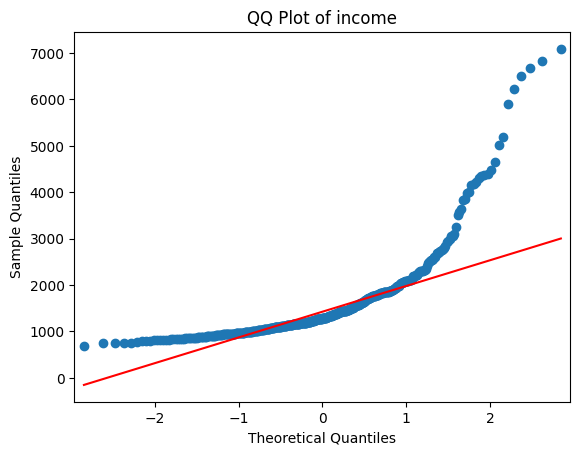

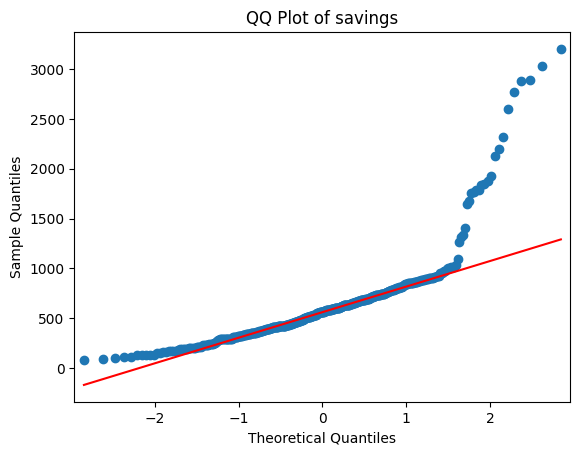

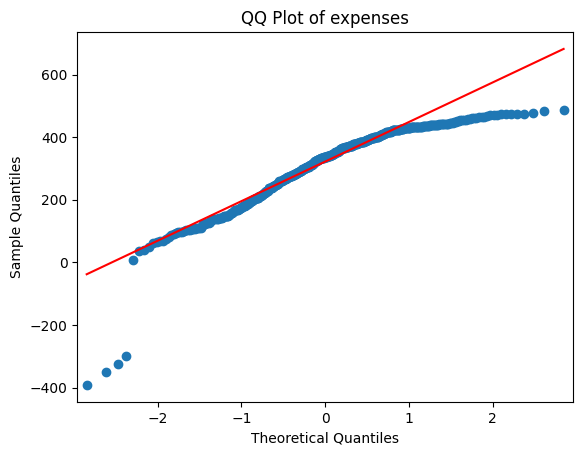

In [34]:
for col in ["income", "savings", "expenses"]:
    fig = sm.qqplot(data[col], line="q")
    plt.title(f"QQ Plot of {col}")
    plt.show()

QQ Plots also show that the mentioned variables aren't normally distributed. We can try to check if taking a logarithm of these values will make it better.


In [35]:
for col in ["income", "savings", "expenses"]:
    col_data = data[col]
    col_data = col_data[col_data >= 0]  # to ensure correct values for log
    col_data = np.log(col_data)

    fig = px.histogram(
        col_data,
        x=col,
        title=f"Histogram of log-{col} variable vs Normal Distribution PDF",
    )
    fig.show()

The situation got a **little** better for income and savings variables (however we can't say they're log-normally distributed) and didn't improve at all in the case of the expenses variable.


#### Task 2


Let's start by calculating Pearson's correlation coefficient for numerical variables.


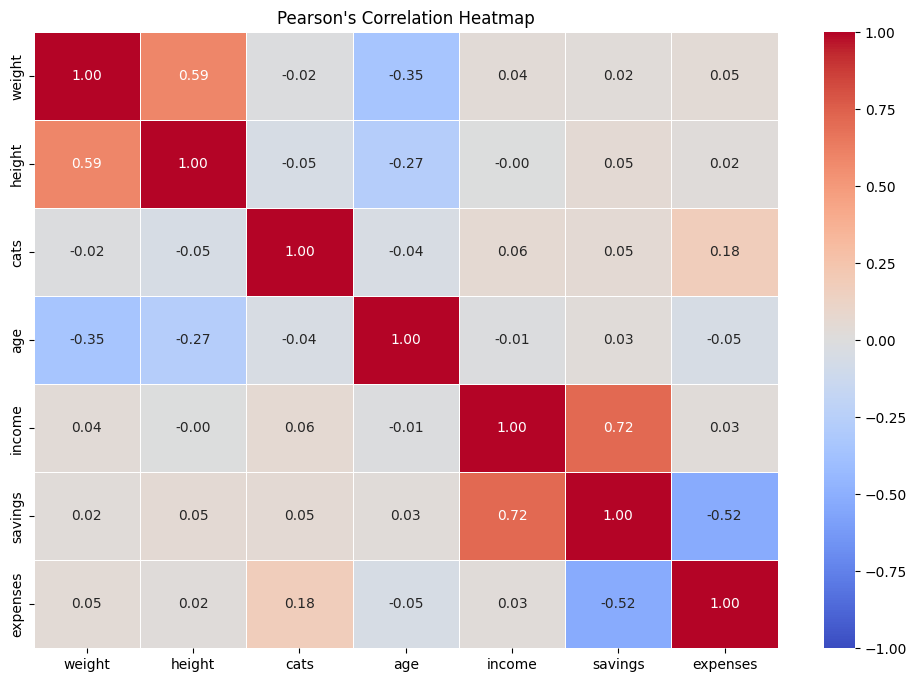

In [ ]:
import seaborn as sns


def get_correlation_matrix(data: pd.DataFrame, method: str):
    pearson_corr = data.corr(method=method.lower())

    plt.figure(figsize=(12, 8))

    sns.heatmap(
        pearson_corr,
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        vmin=-1,
        vmax=1,
        linewidths=0.5,
    )

    plt.title(f"{method}'s Correlation Heatmap")
    plt.show()


data_corr = data[quan_vars]
get_correlation_matrix(data_corr, "Pearson")

We can notice positive Pearson's correlation between following pairs of variables: (width, height), (income, savings) and (cats, expenses), however the last one seems to be weakly correlated (to be verified). There's also a negative Pearson's correlation between the following pairs: (savings, expenses), (age, weight) and (age, height). The problem with Pearson's correlation is that it only detects linear associations between numeric variables containing no outliers. We can remember from the Task 1 that e.g. the expenses variable contains some outliers that may cause errors here.

Alternatively to the Pearson's correlation, we can use rank correlations, e.g. Spearman's or Kendall's correlation. Let's check it now.


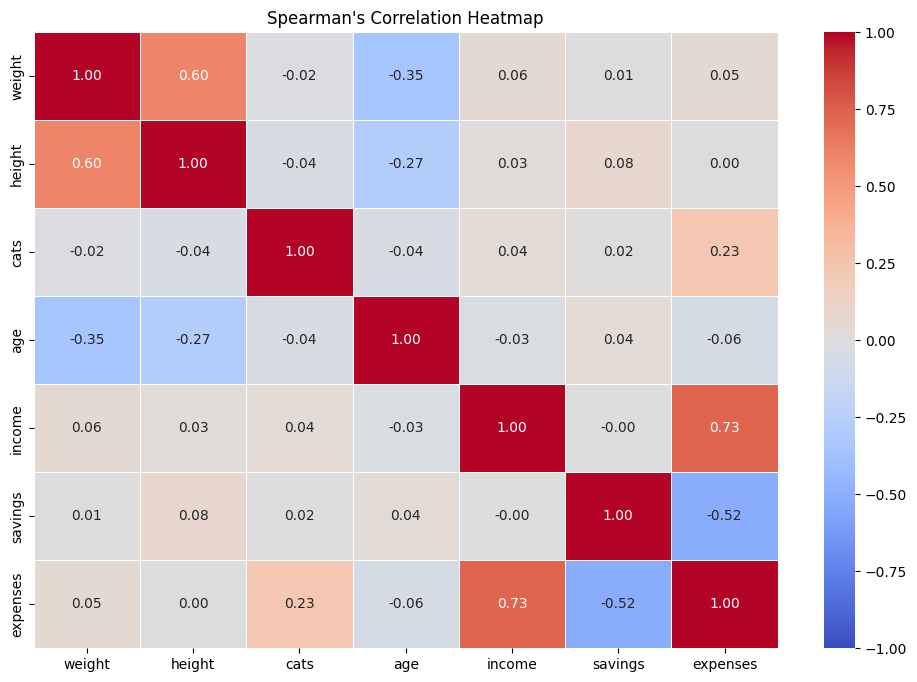

In [60]:
get_correlation_matrix(data_corr, "Spearman")

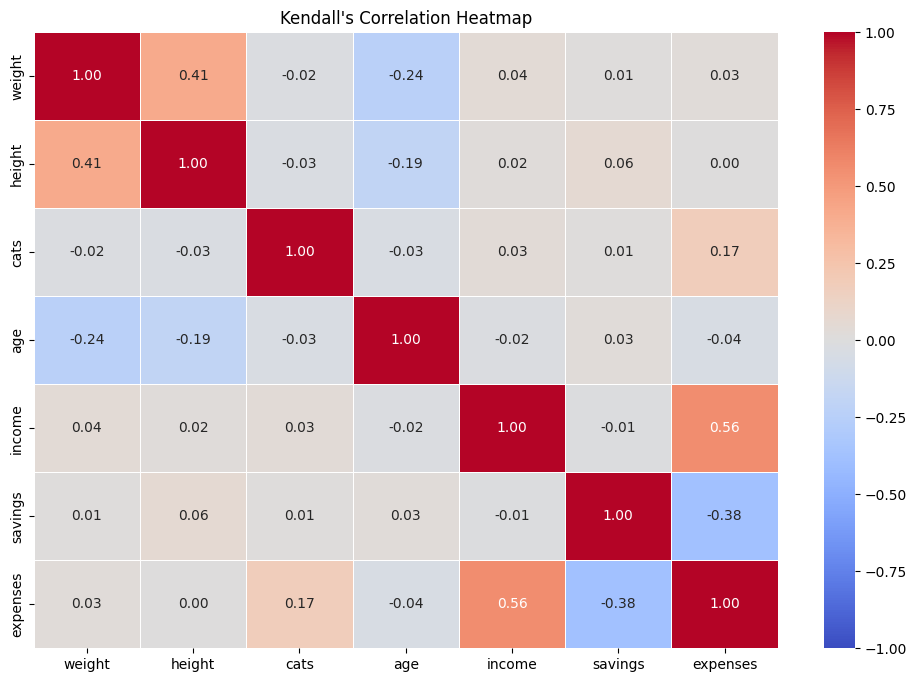

In [61]:
get_correlation_matrix(data_corr, "Kendall")

The above experiments allowed us to spot another positively correlated pair of variables - expenses and income. The reason why this association didn't appear while testing Pearman's correlation may be the non-linear relationship between variables.

Let's now focus on the Spearman's correlation and check whether the found associations are in fact significant:


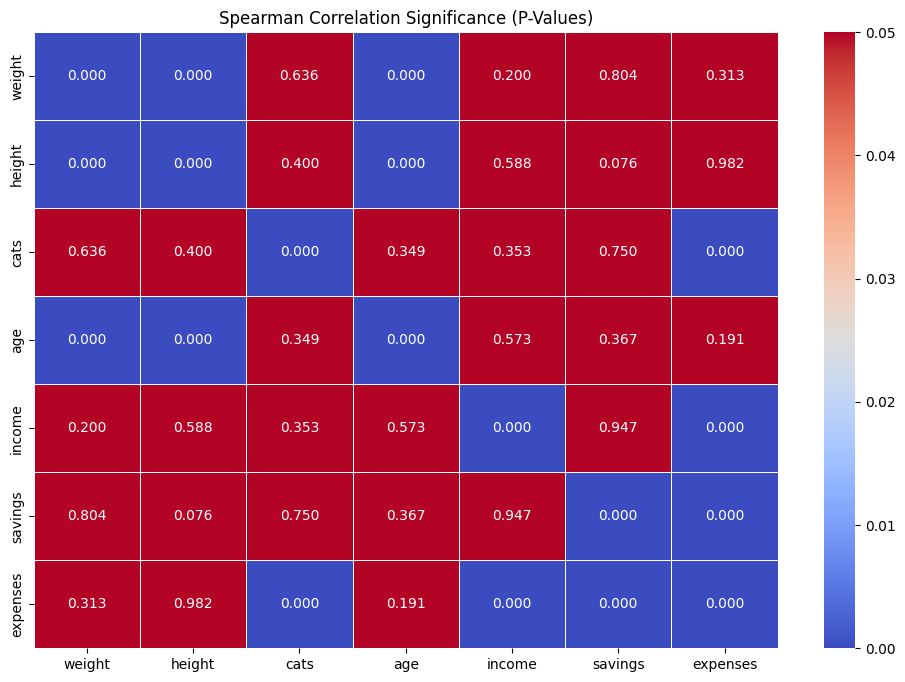

In [ ]:
def test_spearman_significance(data: pd.DataFrame):
    p_values = pd.DataFrame(
        np.ones((data.shape[1], data.shape[1])),
        columns=data.columns,
        index=data.columns,
    )
    for col1 in data.columns:
        for col2 in data.columns:
            _, p_value = stats.spearmanr(data[col1], data[col2])
            p_values.loc[col1, col2] = p_value
    return p_values


spearman_p_values = test_spearman_significance(data_corr)

plt.figure(figsize=(12, 8))
sns.heatmap(
    spearman_p_values,
    annot=True,
    fmt=".3f",
    cmap="coolwarm",
    vmin=0,
    vmax=0.05,
    linewidths=0.5,
)
plt.title("Spearman Correlation Significance (P-Values)")
plt.show()

Assuming a significance level equal to 0.05 we can reject null hypothesis for all the cases we're interested in because of the p-value lower than 0.001 (and therefore lower than 0.05) in each such case. The null hypothesis in this test is that two tested samples have no ordinal correlation. It therefore provides us an evidence for a **significant** effect in each considered case.


Now let's perform some chi-squared independence tests to analyze associations for qualitative variables.


In [75]:
for var1 in qual_vars:
    for var2 in qual_vars:
        if var1 != var2:
            contingency_table = pd.crosstab(data[var1], data[var2])
            chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
            print(f"Chi-squared test between {var1} and {var2}:")
            print(f"p-value: {p}\n")

Chi-squared test between sex and single:
p-value: 0.7423405110026109

Chi-squared test between sex and place:
p-value: 0.8729486601449626

Chi-squared test between single and sex:
p-value: 0.7423405110026109

Chi-squared test between single and place:
p-value: 0.30864280946671163

Chi-squared test between place and sex:
p-value: 0.8729486601449626

Chi-squared test between place and single:
p-value: 0.30864280946671163



Assuming again significance level equal to 0.05 we can't reject the null hypothesis in any case. In this test null hypothesis tells that tested variables are independent. Thus we see that we have no indication that the tested variables are dependent.

We must also remember that this test is quite sensitive to the outliers, but it shouldn't be a problem in our case because we didn't find any outliers in the nominal variables.
